In [210]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = '/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/'
pheno_fin_LOAD = pd.read_csv(path +'pheno_fin_LOAD.tsv',sep = '\t')
pheno_fin = pd.read_csv(path +'pheno_fin.tsv',sep = '\t')
pc = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/36K_preview/somalier_sites/ADSP_ancestry.somalier-ancestry.tsv', sep = '\t')
ibd = pd.read_csv('/gpfs/commons/groups/knowles_lab/data/ADSP_reguloML/ADSP_vcf/phenotype_file/release_36K/pheno_ADSP_IBD.tsv', sep = '\t')

/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (2) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/gpfs/commons/home/tlin/.conda/envs/polyfun/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
print(pheno_fin.shape)
print(ibd.shape)



(26334, 10)
(27071, 40)


In [10]:
ibd

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Sequencing_Center,Sequencing_Platform
0,ADNI_002_S_0685,ADNI_002_S_0685,1.0,0.0,33.0,90.0,5.0,0.0,NaN,ADNI,...,1.2494,-1.9800,0.4404,-1.6879,0.3571,1.1045,-2.2589,-2.8125,Illumina,Illumina_HiSeq_2000
1,ADNI_002_S_1155,ADNI_002_S_1155,0.0,0.0,33.0,69.0,5.0,0.0,NaN,ADNI,...,1.1720,1.3591,1.1451,-0.0500,-0.3733,1.1487,-0.0178,-2.1215,Illumina,Illumina_HiSeq_2000
2,ADNI_002_S_1261,ADNI_002_S_1261,1.0,0.0,33.0,82.0,5.0,0.0,NaN,ADNI,...,-1.8191,0.4448,0.3960,-0.4971,0.0639,0.7521,-0.1974,-2.4702,Illumina,Illumina_HiSeq_2000
3,ADNI_002_S_2010,ADNI_002_S_2010,1.0,0.0,34.0,68.0,6.0,0.0,NaN,ADNI,...,1.2155,-0.9010,1.2350,-0.5126,0.5264,2.6370,-1.3014,-2.9664,Illumina,Illumina_HiSeq_2000
4,ADNI_002_S_2043,ADNI_002_S_2043,1.0,0.0,34.0,73.0,5.0,0.0,NaN,ADNI,...,0.6544,-0.1074,1.2218,-0.5946,1.3398,0.5496,-1.2872,-4.5351,Illumina,Illumina_HiSeq_2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27066,A-CUHS-CU009824,A-CUHS-CU009824-BL-COL-41567BL1,1.0,0.0,33.0,62.0,6.0,1.0,CU0408F,Family_based,...,1.7216,0.4859,-0.7507,0.2706,-1.3342,-0.6434,-0.8623,-2.5705,WashU,Illumina_HiSeqX
27067,A-CUHS-CU005861,A-CUHS-CU005861-BL-COL-49677BL1,1.0,0.0,33.0,58.0,6.0,1.0,CU0170F,Family_based,...,2.9415,-0.6988,-0.9819,-0.5281,-0.2099,2.5507,-0.1355,-1.9739,WashU,Illumina_HiSeqX
27068,A-CUHS-CU009816,A-CUHS-CU009816-BL-COL-41553BL1,1.0,0.0,34.0,76.0,5.0,1.0,CU0400F,Family_based,...,1.5183,-0.0754,-0.1619,-0.4543,-0.7667,0.9952,0.2616,-2.2645,WashU,Illumina_HiSeqX
27069,A-CUHS-CU011550,A-CUHS-CU011550-BL-COL-56372BL1,1.0,0.0,44.0,66.0,6.0,1.0,CU1711F,Family_based,...,-0.5324,0.6456,-0.6681,-0.8344,0.5677,-0.8421,-0.8672,-4.6620,USUHS,Illumina_NovaSeq


## check the ancestry label between the given and the predicted ones

EUR    11547
AMR     6868
AFR     5871
SAS     2687
EAS       98
Name: predicted_ancestry, dtype: int64


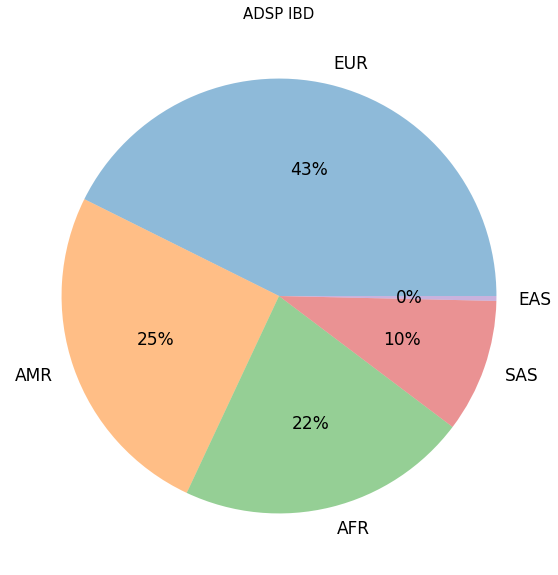

In [20]:
print(ibd.predicted_ancestry.value_counts())
ax = ibd.predicted_ancestry.value_counts(dropna=False).plot.pie(figsize=(10,10), fontsize=17,  autopct='%1.0f%%',wedgeprops={"alpha": 0.5})
ax.set_title('ADSP IBD', fontsize=15)
ax.yaxis.set_visible(False)
#plt.savefig('/gpfs/commons/home/tlin/pic/ADSP_36K_IBD.pdf',format ='pdf',bbox_inches='tight')

In [166]:
ibd_group = ibd.groupby(['Ethnicity','predicted_ancestry']).size().reset_index(name='counts')
pivot_table = pd.pivot_table(data=ibd_group, index=['predicted_ancestry'], columns=['Ethnicity'])

In [159]:
pivot_table

counts        
Ethnicity               0.0     1.0
predicted_ancestry                 
AFR                  4299.0  1463.0
AMR                    75.0  6787.0
EAS                    89.0     9.0
EUR                 10521.0   551.0
SAS                  2684.0     NaN

In [171]:
pivot_table.sum(axis=1)

predicted_ancestry
AFR     5762.0
AMR     6862.0
EAS       98.0
EUR    11072.0
SAS     2684.0
dtype: float64

5762.0
6862.0


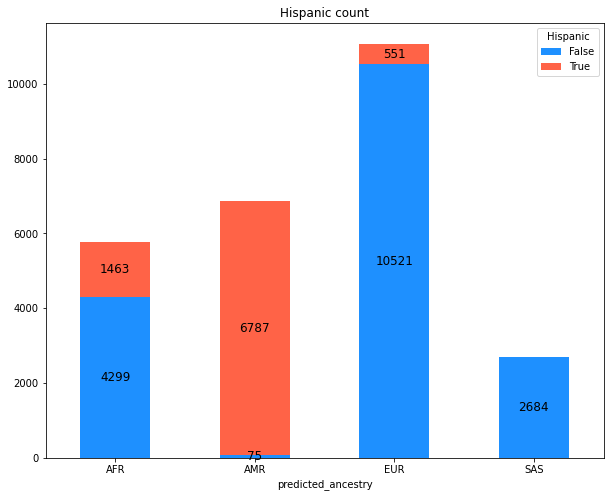

In [181]:
# ax = pivot_table.plot.bar(stacked=True, color =['dodgerblue','tomato' ], figsize=(15,12))
# ax.set_title('hispanic count', fontsize=12)
# ax.legend(title='Hispanic',labels = ['False','True'])
# ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
# pivot_table = pd.pivot_table(data=ibd_group, index=['predicted_ancestry'], columns=['Ethnicity'])

# for container in ax.containers:
#     for bar in container:
#         height = bar.get_height()
#         if height != 0:  # Ensure not to annotate empty bars
#             ax.text(bar.get_x() + bar.get_width() / 2., bar.get_y() + bar.get_height() / 2 + 180, 
#                     f'{height:.0f}', ha='center', va='center', fontsize=12)
#             percentage = (height ) * 100
#             ax.text(bar.get_x() + bar.get_width() / 2., bar.get_y() + bar.get_height() / 2 -180, 
#                     f'{percentage:.1f}%', ha='center', va='center', color='white', fontsize=12)

ibd_group = ibd[ibd.predicted_ancestry != 'EAS'].groupby(['Ethnicity','predicted_ancestry']).size().reset_index(name='counts')
pivot_table = pd.pivot_table(data=ibd_group, index=['predicted_ancestry'], columns=['Ethnicity'])

ax = pivot_table.plot.bar(stacked=True, color=['dodgerblue', 'tomato'], figsize=(10, 8))
ax.set_title('Hispanic count', fontsize=12)
ax.legend(title='Hispanic', labels=['False', 'True'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

# Calculate total count for each predicted ancestry group
total_counts = pivot_table.sum(axis=1)

for container, total_count in zip(ax.containers, total_counts):
    print(total_count)
    for bar in container:
        height = bar.get_height()
        if height != 0:  # Ensure not to annotate empty bars
            count_text = f'{height:.0f}'
            percentage = (height / total_count) * 100
            percentage_text = f'{percentage:.1f}%'
            ax.text(bar.get_x() + bar.get_width() / 2., bar.get_y() + bar.get_height() / 2 , 
                    count_text, ha='center', va='center', color='black', fontsize=12)
            # ax.text(bar.get_x() + bar.get_width() / 2., bar.get_y() + bar.get_height() / 2 -200, 
            #         percentage_text, ha='center', va='center', color='white', fontsize=12)
plt.savefig('/gpfs/commons/home/tlin/pic/ADSP_36K_IBD_hispanic_count.pdf',format ='pdf',bbox_inches='tight')
plt.show()


In [205]:
ibd['His_check'] = ibd.predicted_ancestry
ibd.loc[(ibd.Ethnicity == 1) & (ibd.predicted_ancestry == 'AFR'), 'His_check'] = 'AFR_his'
ibd.loc[(ibd.Ethnicity == 1) & (ibd.predicted_ancestry == 'EUR'), 'His_check'] = 'EUR_his'
#ibd.loc[(ibd.Ethnicity == 0) & (ibd.predicted_ancestry == 'AMR'), 'His_check'] = 'AMR_not_his'

In [206]:
ibd.His_check.value_counts()

EUR        10996
AMR         6868
AFR         4408
SAS         2687
AFR_his     1463
EUR_his      551
EAS           98
Name: His_check, dtype: int64

Text(0.5, 1.0, 'Hispanic check')

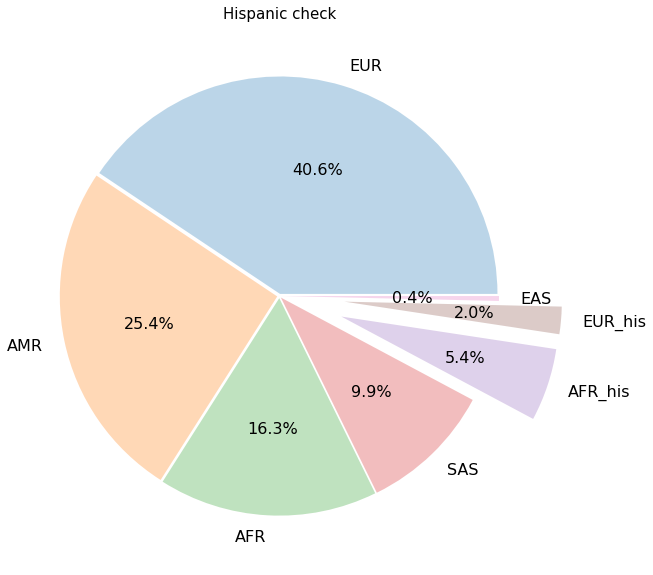

In [208]:
ax = ibd.His_check.value_counts(dropna= True).plot.pie(figsize=(10,10), fontsize=16,  autopct='%1.1f%%',wedgeprops={"alpha": 0.3},
                                                       explode = (0.01,0.01,0.01,0.01,0.3,0.3,0.01))
ax.yaxis.set_visible(False)
ax.set_title('Hispanic check', fontsize=15)



In [ ]:
ibd.to_csv(path + 'ibd_his_check.tsv', sep = '\t', index = False)

In [220]:
remove = ibd[(ibd.His_check == 'AFR_his') | (ibd.His_check == 'EUR_his')]
remove.SampleID.to_csv(path +'ibd_his_remove.txt', header = False, index = False)

In [221]:
remove

,SUBJID,SampleID,Sex,Diagnosis,APOE_reported,Age,Race,Ethnicity,FamID,source,...,PC14,PC15,PC16,PC17,PC18,PC19,PC20,Sequencing_Center,Sequencing_Platform,His_check
121,ADNI_016_S_1117,ADNI_016_S_1117,1.0,1.0,33.0,73.0,5.0,1.0,NaN,ADNI,...,-0.7081,-1.4724,1.5811,-0.8679,0.4011,-0.2355,-3.7083,Illumina,Illumina_HiSeq_2000,EUR_his
123,ADNI_016_S_2007,ADNI_016_S_2007,1.0,1.0,33.0,89.0,5.0,1.0,NaN,ADNI,...,1.8449,-0.7040,1.0388,-1.8985,0.1778,0.5785,-3.0998,Illumina,Illumina_HiSeq_2000,EUR_his
141,ADNI_018_S_4399,ADNI_018_S_4399,1.0,0.0,34.0,83.0,5.0,1.0,NaN,ADNI,...,1.2381,0.6152,0.3414,-0.2494,2.5346,-2.0950,-2.8634,Illumina,Illumina_HiSeq_2000,EUR_his
313,ADNI_041_S_1010,ADNI_041_S_1010,0.0,1.0,34.0,77.0,5.0,1.0,NaN,ADNI,...,0.0531,-0.4896,-0.6167,-0.2307,2.2341,-1.0519,-2.6908,Illumina,Illumina_HiSeq_2000,EUR_his
489,ADNI_099_S_2146,ADNI_099_S_2146,0.0,0.0,33.0,73.0,5.0,1.0,NaN,ADNI,...,0.8163,-0.2551,-0.9312,-1.5921,-1.0133,-0.2960,-3.2036,Illumina,Illumina_HiSeq_2000,EUR_his
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27010,A-CUHS-CU009748,A-CUHS-CU009748-BL-COL-52928BL1,0.0,0.0,34.0,78.0,6.0,1.0,CU0147F,Family_based,...,0.3018,-0.0734,-0.1928,0.0448,1.4971,1.0179,-3.0528,WashU,Illumina_HiSeqX,AFR_his
27053,A-CUHS-CU007086,A-CUHS-CU007086-BL-COL-56331BL1,0.0,0.0,33.0,62.0,6.0,1.0,CU0201F,Family_based,...,1.4637,-0.3950,-0.6730,0.6748,1.7015,-0.9896,-3.2834,WashU,Illumina_HiSeqX,AFR_his
27060,A-CUHS-CU004425,A-CUHS-CU004425-BL-COL-40853BL1,0.0,0.0,33.0,63.0,6.0,1.0,CU0149F,Family_based,...,1.1161,-0.6302,-0.8908,0.4940,1.4535,-1.2119,-2.9259,WashU,Illumina_HiSeqX,AFR_his
27066,A-CUHS-CU009824,A-CUHS-CU009824-BL-COL-41567BL1,1.0,0.0,33.0,62.0,6.0,1.0,CU0408F,Family_based,...,0.4859,-0.7507,0.2706,-1.3342,-0.6434,-0.8623,-2.5705,WashU,Illumina_HiSeqX,AFR_his
